# Explore here

# Impots necesarios:

In [ ]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

# Paso 3: Declarar las variables de entorno

In [ ]:
# loading the .env file variables:
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Paso 4: Inicializar biblioteca Spotipy

In [59]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

artist_uri = 'spotify:artist:1oZmFNkGAT93yD1xX4vTRE'
results = spotify.artist_top_tracks(artist_uri)
results

{'tracks': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1oZmFNkGAT93yD1xX4vTRE'},
      'href': 'https://api.spotify.com/v1/artists/1oZmFNkGAT93yD1xX4vTRE',
      'id': '1oZmFNkGAT93yD1xX4vTRE',
      'name': 'Nina Kraviz',
      'type': 'artist',
      'uri': 'spotify:artist:1oZmFNkGAT93yD1xX4vTRE'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',


# Paso 5: Realizar solicitudes API

* *Creo una nueva lista para sacar la información que me interesa:*

In [60]:
top_10songs=[] 
for track in results['tracks'][:10]:
   top_10songs.append({'track':track['name'],
                       'popularity':track['popularity'],
                       'duration_min':track['duration_ms']/60000})
top_10songs


[{'track': 'bailando - nk & david löhlein version',
  'popularity': 43,
  'duration_min': 5.7},
 {'track': 'My Lullaby for You',
  'popularity': 43,
  'duration_min': 5.576433333333333},
 {'track': "I'm Gonna Get You",
  'popularity': 42,
  'duration_min': 9.968216666666667},
 {'track': 'Skyscrapers - Hi-Lo Remix',
  'popularity': 42,
  'duration_min': 4.939466666666666},
 {'track': 'Ghetto Kraviz',
  'popularity': 40,
  'duration_min': 3.7466666666666666},
 {'track': "Surprise Me, I'm Surprised Today",
  'popularity': 38,
  'duration_min': 6.45675},
 {'track': 'Pain In The Ass',
  'popularity': 37,
  'duration_min': 6.672883333333333},
 {'track': 'white horse',
  'popularity': 37,
  'duration_min': 5.7282166666666665},
 {'track': 'tarde', 'popularity': 35, 'duration_min': 5.558333333333334},
 {'track': "I'm Week", 'popularity': 34, 'duration_min': 8.326866666666668}]

# Paso 6: Crear Pandas DataFrame

* *Creo un dataframe filtrado por las canciones más populares:*

In [61]:
df = pd.DataFrame(top_10songs)
df

,track,popularity,duration_min
0,bailando - nk & david löhlein version,43,5.700000
1,My Lullaby for You,43,5.576433
2,I'm Gonna Get You,42,9.968217
3,Skyscrapers - Hi-Lo Remix,42,4.939467
4,Ghetto Kraviz,40,3.746667
5,"Surprise Me, I'm Surprised Today",38,6.456750
6,Pain In The Ass,37,6.672883
7,white horse,37,5.728217
8,tarde,35,5.558333
9,I'm Week,34,8.326867


# Paso 7: Análisis de la relación estadística: Scatterplot

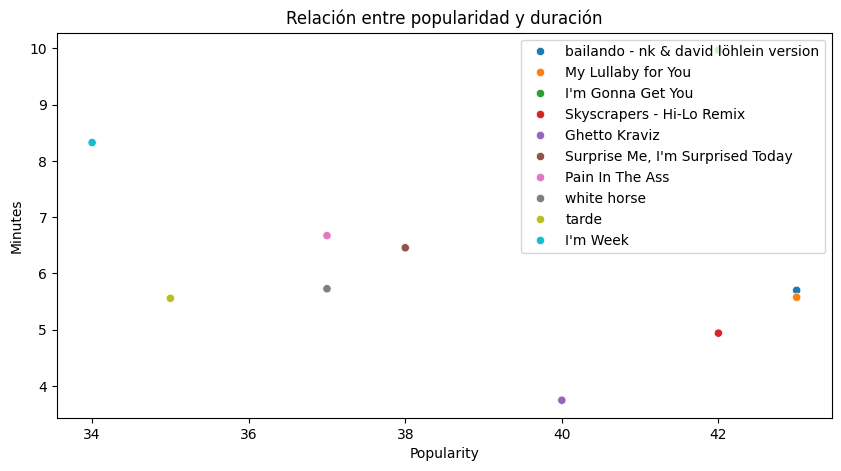

In [ ]:
plt.figure(figsize = (10, 5))

sns.scatterplot(data=df,x='popularity',y='duration_min',hue='track')

plt.title("Relación entre popularidad y duración")
plt.xlabel('Popularity')
plt.ylabel('Minutes')
plt.legend()
plt.show()